In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:11<00:00, 204MB/s]
100% 1.06G/1.06G [00:11<00:00, 96.8MB/s]


In [4]:
import zipfile
zip_ref=zipfile.ZipFile("/content/dogs-vs-cats.zip")
zip_ref.extractall('/content')
zip_ref.close()


In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout

In [6]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [7]:
def process (image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 85s 136ms/step - loss: 0.5785 - accuracy: 0.6834 - val_loss: 0.5880 - val_accuracy: 0.7167
Epoch 2/10
625/625 [==============================] - 98s 156ms/step - loss: 0.5022 - accuracy: 0.7330 - val_loss: 0.5085 - val_accuracy: 0.7387
Epoch 3/10
625/625 [==============================] - 98s 156ms/step - loss: 0.4378 - accuracy: 0.7790 - val_loss: 0.4245 - val_accuracy: 0.8041
Epoch 4/10
625/625 [==============================] - 98s 156ms/step - loss: 0.3855 - accuracy: 0.8192 - val_loss: 0.4048 - val_accuracy: 0.8161
Epoch 5/10
625/625 [==============================] - 85s 135ms/step - loss: 0.3290 - accuracy: 0.8457 - val_loss: 0.2917 - val_accuracy: 0.8576
Epoch 6/10
625/625 [==============================] - 91s 145ms/step - loss: 0.2663 - accuracy: 0.8734 - val_loss: 0.2265 - val_accuracy: 0.8946
Epoch 7/10
625/625 [==============================] - 98s 156ms/step - loss: 0.2339 - accuracy: 0.8890 - val_loss: 0.1914 - val_ac

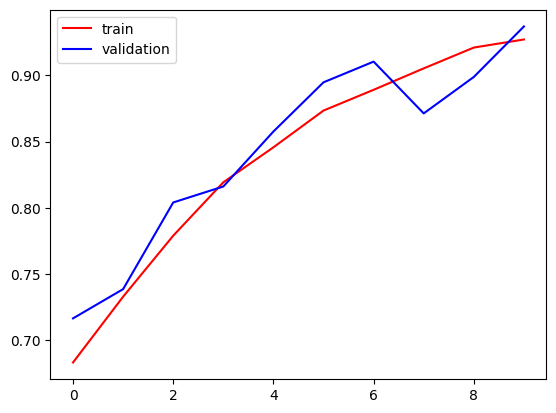

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

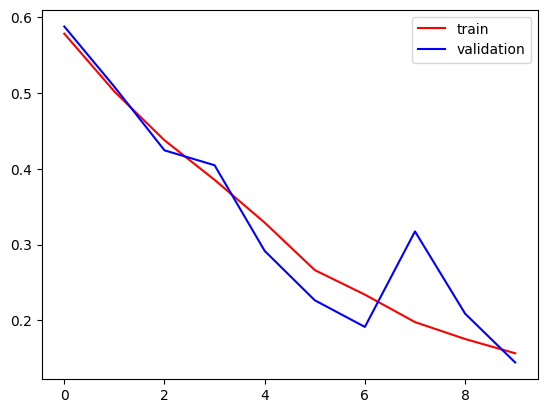

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [15]:
import cv2

In [30]:
test_image=cv2.imread('/content/cat.jpeg')

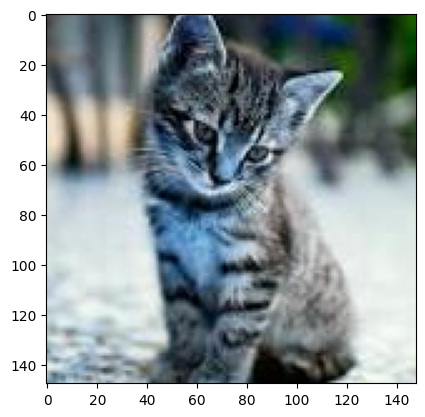

In [31]:
plt.imshow(test_image)

In [32]:
test_image.shape

(148, 148, 3)

In [33]:
test_image=cv2.resize(test_image,(256,256))

In [34]:
test_input=test_image.reshape(1,256,256,3)

In [35]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)